In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression



from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
forestfires = pd.read_csv('C:/ExcelR/Data Science Assignments/17- Support Vector Machines/forestfires.csv')

In [4]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
import matplotlib.pyplot as plt

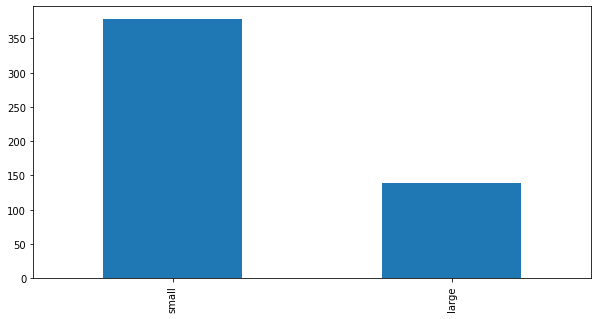

In [7]:
plt.figure(figsize=(10,5))
forestfires.size_category.value_counts().plot.bar();

In [8]:
#Scaling the data 
forestfires1= forestfires.iloc[:,2:30]

# Converting into numpy array
forestfires2 = forestfires1.values
forestfires2

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   0. ],
       [ 90.6,  35.4, 669.1, ...,   0. ,   1. ,   0. ],
       [ 90.6,  43.7, 686.9, ...,   0. ,   1. ,   0. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   0. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   0. ],
       [ 79.5,   3. , 106.7, ...,   1. ,   0. ,   0. ]])

In [9]:
# Normalizing the numerical data 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

forestfires_norm = norm_func(forestfires2)

In [10]:
forestfires_norm

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

In [11]:
from sklearn.decomposition import PCA

In [12]:
#Getting PCA component out of 28 features
pca = PCA(n_components = 28)
pca_values = pca.fit_transform(forestfires_norm)

In [14]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.07093176e-01, 5.78803113e-02, 3.02921761e-02, 3.89483042e-03,
       4.29397705e-04, 2.09240390e-04, 1.41323146e-04, 3.94232459e-05,
       3.70786517e-06, 2.46118489e-06, 2.22244400e-06, 2.08057171e-06,
       1.84475426e-06, 1.67548854e-06, 1.50865000e-06, 1.16350198e-06,
       1.04310680e-06, 8.13087873e-07, 5.39877566e-07, 3.93614562e-07,
       2.96154791e-07, 1.71998865e-07, 8.65079445e-08, 4.91906496e-08,
       3.64939872e-08, 2.72643301e-08, 7.86379710e-33, 7.86379710e-33])

In [15]:
# Cumulative variance 
var_cum = np.cumsum(np.round(var,decimals = 4)*100)
var_cum

array([90.71, 96.5 , 99.53, 99.92, 99.96, 99.98, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99])

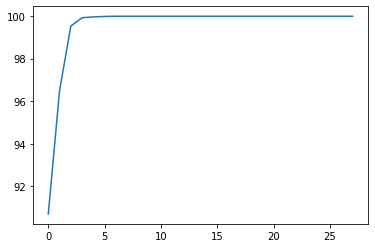

In [16]:
# Variance plot for PCA components obtained 
plt.plot(var_cum)

In [19]:
#selecting first 3 PCA's out of 28
df_forestfires = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),
                     forestfires[['size_category']]], axis = 1)
df_forestfires

,pc1,pc2,pc3,size_category
0,0.423296,-0.006184,-0.001082,small
1,-0.096672,-0.019790,-0.087218,small
2,-0.114051,-0.019699,-0.082730,small
3,0.437314,-0.006019,0.010666,small
4,0.412064,-0.005438,0.022902,small
...,...,...,...,...
512,-0.097127,-0.012306,-0.068155,large
513,-0.097584,0.030727,-0.069555,large
514,-0.097032,-0.008666,-0.066566,large
515,-0.065922,-0.010941,0.021658,small


In [20]:
array = df_forestfires.values
X = array[:,0:3]
Y = array[:,3]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=8)

In [23]:
#LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
lr_result = model.score(X_test, Y_test)
np.round(result, 4)

0.7427

In [24]:
#KNN classification
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model_knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_knn, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.7693801344286781
{'n_neighbors': 1}


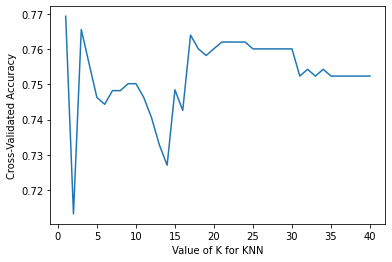

In [26]:
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [29]:
#KNN Classification
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=10)
model_knn1 = KNeighborsClassifier(n_neighbors=1)
results_knn1 = cross_val_score(model_knn1, X, Y, cv=kfold)
print(results_knn1.mean())

0.8104072398190045


In [30]:
# SVM Classification
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [31]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.9021008403361345)

In [32]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc_svm = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc_svm)
confusion_matrix(Y_test, y_pred)

Accuracy = 91.22807017543859


array([[ 30,  15],
       [  0, 126]], dtype=int64)

In [ ]:
#Based on above results SVM gives higher accuracy - 91.23